In [134]:
import yfinance as yf
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
%matplotlib inline



tickerSymbol = 'GOOGL'

tickerData = yf.Ticker(tickerSymbol)

In [114]:
tickerDf = tickerData.history(period='1d', start='2010-5-31', end='2024-5-31')

In [115]:
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-01 00:00:00-04:00,11.993076,12.258435,11.985337,12.041504,106565328,0.0,0.0
2010-06-02 00:00:00-04:00,12.149096,12.328581,12.018788,12.316100,101530368,0.0,0.0
2010-06-03 00:00:00-04:00,12.359536,12.681313,12.349302,12.621401,145881972,0.0,0.0
2010-06-04 00:00:00-04:00,12.474616,12.712515,12.399227,12.449653,156655188,0.0,0.0
2010-06-07 00:00:00-04:00,12.458141,12.504323,12.060977,12.120139,145162692,0.0,0.0


In [116]:
df = pd.DataFrame(tickerDf)

In [117]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [118]:
df.columns = df.columns.str.strip()

In [119]:
print(df.index)

DatetimeIndex(['2010-06-01 00:00:00-04:00', '2010-06-02 00:00:00-04:00',
               '2010-06-03 00:00:00-04:00', '2010-06-04 00:00:00-04:00',
               '2010-06-07 00:00:00-04:00', '2010-06-08 00:00:00-04:00',
               '2010-06-09 00:00:00-04:00', '2010-06-10 00:00:00-04:00',
               '2010-06-11 00:00:00-04:00', '2010-06-14 00:00:00-04:00',
               ...
               '2024-05-16 00:00:00-04:00', '2024-05-17 00:00:00-04:00',
               '2024-05-20 00:00:00-04:00', '2024-05-21 00:00:00-04:00',
               '2024-05-22 00:00:00-04:00', '2024-05-23 00:00:00-04:00',
               '2024-05-24 00:00:00-04:00', '2024-05-28 00:00:00-04:00',
               '2024-05-29 00:00:00-04:00', '2024-05-30 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=3524, freq=None)


In [120]:
df = df.reset_index()

In [121]:
df['Date'] = pd.to_datetime(df['Date'])


In [122]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-01 00:00:00-04:00,11.993076,12.258435,11.985337,12.041504,106565328,0.0,0.0
1,2010-06-02 00:00:00-04:00,12.149096,12.328581,12.018788,12.316100,101530368,0.0,0.0
2,2010-06-03 00:00:00-04:00,12.359536,12.681313,12.349302,12.621401,145881972,0.0,0.0
3,2010-06-04 00:00:00-04:00,12.474616,12.712515,12.399227,12.449653,156655188,0.0,0.0
4,2010-06-07 00:00:00-04:00,12.458141,12.504323,12.060977,12.120139,145162692,0.0,0.0


In [123]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


In [124]:
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)

In [125]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-01,11.993076,12.258435,11.985337,12.041504,106565328,0.0,0.0
1,2010-06-02,12.149096,12.328581,12.018788,12.316100,101530368,0.0,0.0
2,2010-06-03,12.359536,12.681313,12.349302,12.621401,145881972,0.0,0.0
3,2010-06-04,12.474616,12.712515,12.399227,12.449653,156655188,0.0,0.0
4,2010-06-07,12.458141,12.504323,12.060977,12.120139,145162692,0.0,0.0


In [126]:
df = df.rename(columns={'Date': 'ds',  'Close': 'y'})
df.head()

,ds,Open,High,Low,y,Volume,Dividends,Stock Splits
0,2010-06-01,11.993076,12.258435,11.985337,12.041504,106565328,0.0,0.0
1,2010-06-02,12.149096,12.328581,12.018788,12.316100,101530368,0.0,0.0
2,2010-06-03,12.359536,12.681313,12.349302,12.621401,145881972,0.0,0.0
3,2010-06-04,12.474616,12.712515,12.399227,12.449653,156655188,0.0,0.0
4,2010-06-07,12.458141,12.504323,12.060977,12.120139,145162692,0.0,0.0


In [127]:
df1 = df[['ds', 'y']]

In [128]:
model = Prophet()

In [129]:
model.fit(df1)

04:56:42 - cmdstanpy - INFO - Chain [1] start processing
04:56:42 - cmdstanpy - INFO - Chain [1] done processing


In [130]:
future = model.make_future_dataframe(periods=5*365)

In [131]:
forecast = model.predict(future)

In [132]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

             ds        yhat  yhat_lower  yhat_upper
5344 2029-05-25  150.901241   94.373882  204.442897
5345 2029-05-26  150.756648   94.953537  206.391813
5346 2029-05-27  150.633381   93.470229  206.520095
5347 2029-05-28  150.573016   96.925723  203.991919
5348 2029-05-29  150.387437   95.420086  206.322127


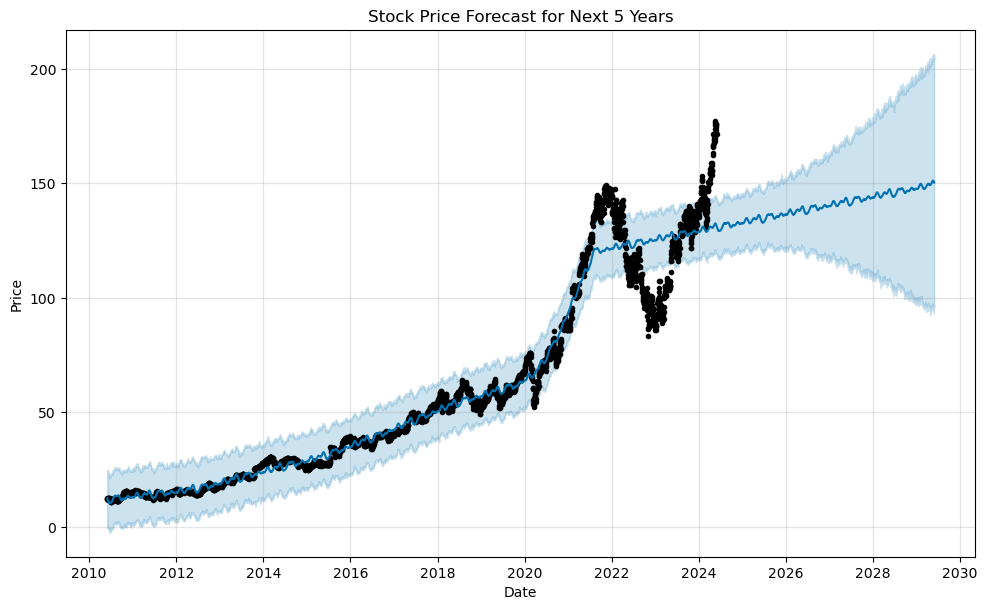

In [133]:
fig1 = model.plot(forecast)
plt.title("Stock Price Forecast for Next 5 Years")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()